## Ïã§ÏäµÎ™©Ìëú

------------------

* AugmentationÏùÑ Î™®Îç∏ ÌïôÏäµÏóê Ï†ÅÏö©ÌïòÍ∏∞
* AugmentationÏùò Ï†ÅÏö©ÏùÑ ÌÜµÌïú ÌïôÏäµ Ìö®Í≥º ÌôïÏù∏ÌïòÍ∏∞
* ÏµúÏã† data augmentation Í∏∞Î≤ï Íµ¨ÌòÑ Î∞è ÌôúÏö©ÌïòÍ∏∞

## ÌïôÏäµ ÎÇ¥Ïö©

----------

1. Augmentation Ï†ÅÏö© (1) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
2. Augmentation Ï†ÅÏö© (2) Augmentation Ï†ÅÏö©ÌïòÍ∏∞
3. Augmentation Ï†ÅÏö© (3) ÎπÑÍµê Ïã§ÌóòÌïòÍ∏∞
4. Ïã¨Ìôî Í∏∞Î≤ï (1) Cutmix Augmentation
5. Ïã¨Ìôî Í∏∞Î≤ï (2) Mixup Augmentation
6. ÌîÑÎ°úÏ†ùÌä∏: CutMix ÎòêÎäî Mixup ÎπÑÍµêÏã§ÌóòÌïòÍ∏∞

## Augmentation Ï†ÅÏö© 

## (1) Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
# Î®ºÏ†Ä ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Îì§ÏùÑ Î∂àÎü¨Ïò§Í≤†ÏäµÎãàÎã§!
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

print('=3')

=3


**GPUÌôòÍ≤Ω**ÏùÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

#### [stanford_dogs](https://www.tensorflow.org/datasets/catalog/stanford_dogs)ÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
* 120Í∞ú Í≤¨Ï¢ÖÏùò Ïù¥ÎØ∏ÏßÄÌè¨Ìï®
* Ï¥ù 20,580Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÏóêÏÑú 12,000Ïû•ÏùÄ ÌïôÏäµÏÖã, ÎÇòÎ®∏ÏßÄ 8,580Ïû•ÏùÄ ÌèâÍ∞ÄÏö© Îç∞Ïù¥ÌÑ∞ÏÖã

In [25]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)

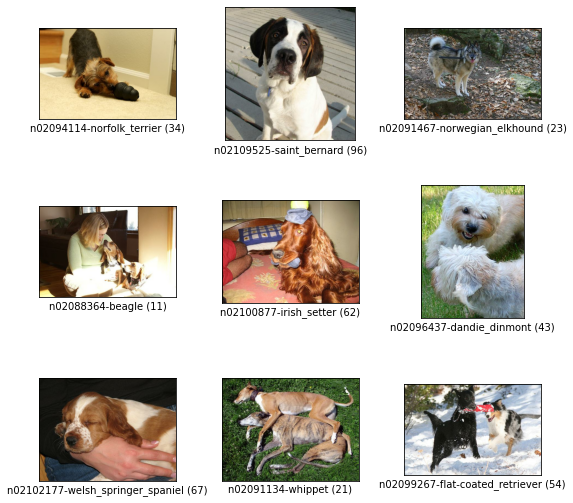

In [26]:
fig = tfds.show_examples(ds_train, ds_info)

## (2) Augmentation Ï†ÅÏö©ÌïòÍ∏∞

--------

ÌÖêÏÑúÌîåÎ°úÏö∞ Random Augmentation API ÏÇ¨Ïö©ÌïòÍ∏∞    

Ïù¥ÎØ∏ÏßÄÏÖãÏóê ÎåÄÌï¥ÏÑú ÎûúÎç§Ìïú ÌôïÎ•†Î°ú Î∞îÎ°ú Ï†ÅÏö©Ìï† Ïàò ÏûàÎäî augmentation Ìï®ÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

* random_brightness()
* random_contrast()
* random_crop()
* random_flip_left_right()
* random_flip_up_down()
* random_hue()
* random_jpeg_quality()
* random_saturation()

In [5]:
# 0~1ÏÇ¨Ïù¥Ïùò float32Î°ú normalizeÌïòÍ≥† (224,224)ÏÇ¨Ïù¥Ï¶àÎ°ú resize
def normalize_and_resize_img(image,label):
    image = tf.image.resize(image,[224,224])
    return tf.cast(image,tf.float32)/255.,label

flipÏùÑ Ï¢åÏö∞ÎåÄÏπ≠ÏúºÎ°ú Ï†ÅÏö©ÌïòÍ≥† ÏÉÅÌïòÎåÄÏπ≠ÏùÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î¥§ÏùÑ Îïå ÏúÑÏïÑÎûòÍ∞Ä Îí§ÏßëÌûå ÏÇ¨ÏßÑÏù¥ ÏóÜÍ∏∞ÎïåÎ¨∏Ïóê Ï¢åÏö∞ÎåÄÏπ≠Îßå Ï†ÅÏö©ÌïòÍ≤†ÏäµÎãàÎã§

In [6]:
def augment(image,label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.clip_by_value(image, 0, 1)
    return image, label

In [10]:
# Îç∞Ïù¥ÌÑ∞ÏÖã(ds)ÏùÑ Í∞ÄÍ≥µÌïòÎäî Î©îÏù∏Ìï®Ïàò
def apply_normalize_on_dataset(ds, is_test=False, batch_size=16, with_aug=False):
    ds = ds.map(
        normalize_and_resize_img,  # Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò Ï†ÅÏö©
        num_parallel_calls=2
    )
    # with_aug Îß§Í∞úÎ≥ÄÏàòÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú augmentationÏùò Ï†ÅÏö©Ïó¨Î∂ÄÎ•º Í≤∞Ï†ïÌï† Ïàò ÏûàÎèÑÎ°ù Ìï®
    if not is_test and with_aug:
        ds = ds.map(
            augment,       # augment Ìï®Ïàò Ï†ÅÏö©
            num_parallel_calls=2
        )
    ds = ds.batch(batch_size)
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('=3')

=3


### Random Augmentation ÏßÅÏ†ë Íµ¨ÌòÑÌïòÍ∏∞


In [8]:
def augment2(image,label):
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    image = tf.image.resize(image, [224, 224])
    return image, label

## (3) ÎπÑÍµêÏã§Ìóò ÌïòÍ∏∞

In [13]:
num_classes = ds_info.features["label"].num_classes
resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top=False, # ÎßàÏßÄÎßâ fully connected layerÎ•º Ìè¨Ìï®Ìï†ÏßÄ Ïó¨Î∂Ä
        weights='imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])
print('=3')

=3


üîº include_top=False - Ìï¥Îãπ Î†àÏù¥Ïñ¥Î•º Ìè¨Ìï®ÌïòÏßÄ ÏïäÍ≥† ÏÉùÏÑ±ÌïòÍ≤å ÎêòÎ©¥ ÌäπÏÑ± Ï∂îÏ∂úÍ∏∞ Î∂ÄÎ∂ÑÎßå Î∂àÎü¨ÏôÄÏÑúÌïÑÏöîÏóê ÎßûÍ≤å ÏàòÏ†ïÎêú fully connected layerÎ•º Î∂ôÏó¨ÏÑú ÌôúÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [10]:
# augmentationÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌïôÏäµÏãúÌÇ¨ ResNetÏùÑ ÌïòÎÇò Îçî ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§!
aug_resnet50 = keras.models.Sequential([
    keras.applications.resnet.ResNet50(
        include_top = False,
        weights = 'imagenet',
        input_shape=(224,224,3),
        pooling='avg',
    ),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [11]:
(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    as_supervised=True,
    shuffle_files=True,
    with_info=True,
)
# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Ïóê ÌïòÎÇòÎäî with_augÎ•º FalseÎ°ú Ï£ºÏñ¥ augmentationÏù¥ Ï†ÅÏö©ÎêòÏßÄ ÏïäÎèÑÎ°ù Ìï©ÎãàÎã§.
ds_train_no_aug = apply_normalize_on_dataset(ds_train, with_aug=False)
ds_train_aug = apply_normalize_on_dataset(ds_train, with_aug=True)
ds_test = apply_normalize_on_dataset(ds_test, is_test=True)
print('=3')

=3


Ïù¥Ï†ú ÎëêÍ∞ú Î™®Îç∏Ïóê Í∞ÅÍ∞Å 1. augmentationÏù¥ Ï†ÅÏö©Îêú Îç∞Ïù¥ÌÑ∞ÏÖã , 2. augmentationÏù¥ Ï†ÅÏö©ÎêòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌïôÏäµÏãúÌÇ§Í≥† Í≤ÄÏ¶ùÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.

In [12]:
#EPOCH = 20  # Augentation Ï†ÅÏö© Ìö®Í≥ºÎ•º ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú epoch Ïàò
EPOCH = 3

resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

aug_resnet50.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01),
    metrics=['accuracy'],
)

history_resnet50_no_aug = resnet50.fit(
    ds_train_no_aug, # augmentation Ï†ÅÏö©ÌïòÏßÄ ÏïäÏùÄ Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

history_resnet50_aug = aug_resnet50.fit(
    ds_train_aug, # augmentation Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©
    steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
    validation_steps=int(ds_info.splits['test'].num_examples/16),
    epochs=EPOCH,
    validation_data=ds_test,
    verbose=1,
    use_multiprocessing=True,
)

Epoch 1/3
750/750 [==============================] - 345s 426ms/step - loss: 3.1869 - accuracy: 0.2833 - val_loss: 3.3586 - val_accuracy: 0.2212
Epoch 2/3
750/750 [==============================] - 310s 414ms/step - loss: 0.8660 - accuracy: 0.7576 - val_loss: 1.0835 - val_accuracy: 0.6824
Epoch 3/3
750/750 [==============================] - 310s 413ms/step - loss: 0.2653 - accuracy: 0.9414 - val_loss: 0.9464 - val_accuracy: 0.7240
Epoch 1/3
750/750 [==============================] - 317s 415ms/step - loss: 3.2387 - accuracy: 0.2657 - val_loss: 3.3888 - val_accuracy: 0.2144
Epoch 2/3
750/750 [==============================] - 310s 413ms/step - loss: 1.1043 - accuracy: 0.6840 - val_loss: 1.5876 - val_accuracy: 0.5632
Epoch 3/3
750/750 [==============================] - 310s 413ms/step - loss: 0.5995 - accuracy: 0.8338 - val_loss: 1.1235 - val_accuracy: 0.6725


ÌõàÎ†®Í≥ºÏ†ïÏùÑ ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

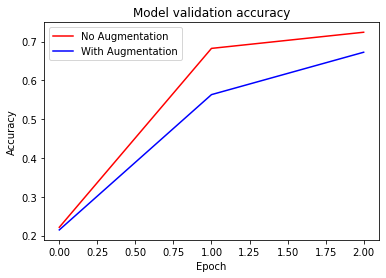

In [13]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.show()

Ï¢Ä Îçî ÌôïÎåÄÌï¥ÏÑú ÏãúÍ∞ÅÌôî Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

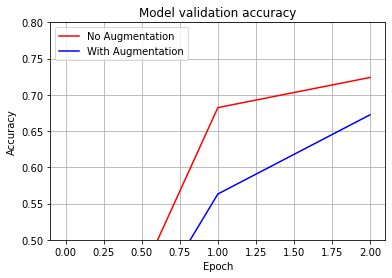

In [14]:
plt.plot(history_resnet50_no_aug.history['val_accuracy'], 'r')
plt.plot(history_resnet50_aug.history['val_accuracy'], 'b')
plt.title('Model validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['No Augmentation', 'With Augmentation'], loc='upper left')
plt.grid(True)
plt.ylim(0.50, 0.80)    # Ï∂úÎ†•ÌïòÍ≥†Ïûê ÌïòÎäî  Accuracy Î≤îÏúÑÎ•º ÏßÄÏ†ïÌï¥ Ï£ºÏÑ∏Ïöî. 
#plt.ylim(0.72, 0.76)  # EPOCH=20ÏúºÎ°ú ÏßÑÌñâÌïúÎã§Î©¥ Ïù¥ Î≤îÏúÑÍ∞Ä Ï†ÅÎãπÌï©ÎãàÎã§. 
plt.show()

## Ïã¨Ìôî Í∏∞Î≤ï (1) Cutmix Augmentation

--------------

Ï°∞Í∏à Îçî Î≥µÏû°Ìïú augmentation Î∞©Î≤ïÏùÑ ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

* #### Ïù¥Î¶ÑÏù∏ CutMixÎ•º Î≥¥Í≥† Ïú†Ï∂îÌï† Ïàò ÏûàÎìØ Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º ÏûêÎ•¥Í≥† ÏÑûÎäîÎã§Í≥† ÏÉùÍ∞ÅÌï† Ïàò ÏûàÏäµÎãàÎã§.
* #### CutMixÎäî Î™®Îç∏Ïù¥ Í∞ùÏ≤¥Ïùò Ï∞®Ïù¥Î•º ÏãùÎ≥ÑÌï† Ïàò ÏûàÎäî Î∂ÄÎ∂ÑÏóê ÏßëÏ§ëÌïòÏßÄ ÏïäÍ≥†, Îçú Íµ¨Î≥ÑÎêòÎäî Î∂ÄÎ∂Ñ Î∞è Ïù¥ÎØ∏ÏßÄÏùò Ï†ÑÏ≤¥Ï†ÅÏù∏ Íµ¨Ïó≠ÏùÑ Î≥¥Í≥† ÌïôÏäµÎèÑÎ°ù ÌïòÏó¨ ÏùºÎ∞òÌôîÏôÄ localization ÏÑ±Îä•ÏùÑ ÎÜíÏù¥Îäî Î∞©Î≤ïÏûÖÎãàÎã§.

### 1) Ïù¥ÎØ∏ÏßÄ ÏÑûÍ∏∞

-------------------------

* Î®ºÏ†Ä Îëê Í∞úÏùò Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÏñ¥Ï£ºÎäî Í≤ÉÎ∂ÄÌÑ∞ ÏÉùÍ∞ÅÏùÑ Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
* Î∞∞Ïπò ÎÇ¥Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Îëê Í∞ú Í≥®ÎùºÏÑú ÏÑûÏñ¥Ï£ºÎäîÎç∞, Ïù¥Îïå Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÏûòÎùºÏÑú ÏÑûÏñ¥Ï£ºÎäî ÏòÅÏó≠ÏùÑ **Î∞îÏö¥Îî© Î∞ïÏä§(bounding box)** ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.

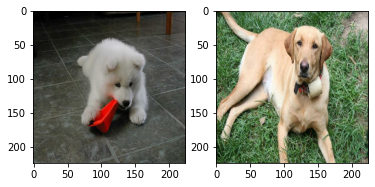

In [15]:
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ÏÖãÏóêÏÑú Ïù¥ÎØ∏ÏßÄ 2Í∞úÎ•º Í∞ÄÏ†∏ÏòµÎãàÎã§. 
for i, (image, label) in enumerate(ds_train_no_aug.take(1)):
    if i == 0:
        image_a = image[0]
        image_b = image[1]
        label_a = label[0]
        label_b = label[1]
        break

plt.subplot(1,2,1)
plt.imshow(image_a)

plt.subplot(1,2,2)
plt.imshow(image_b)

plt.show()

In [16]:
# Ï≤´ Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ(a)Î•º Î∞∞Í≤Ω Ïù¥ÎØ∏ÏßÄÎ°ú ÌïòÍ≥† Í±∞Í∏∞Ïóê ÏÇΩÏûÖÌï† Îëê Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ(b)Í∞Ä ÏûàÏùÑ Îïå 
# Ï≤´ Î≤àÏß∏ ÏòÅÏó≠Ïùò Î∞îÏö¥Îî© Î∞ïÏä§Ïùò ÏúÑÏπòÎ•º Í≤∞Ï†ïÌïòÎäî Ìï®ÏàòÎ•º Î®ºÏ†Ä Íµ¨ÌòÑÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
# ÏûÑÏùòÏùò Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÏóê ÎåÄÌï¥ÏÑúÎèÑ Ïú†Ïó∞ÌïòÍ≤å ÎåÄÏùë Í∞ÄÎä•ÌïòÎèÑÎ°ù Íµ¨ÌòÑ
def get_clip_box(image_a, image_b):
    # image.shape = (height, width, channel)
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0]
    
    # get center of box
    # tf.cast : ÌÖêÏÑúÎ•º ÏÉàÎ°úÏö¥ ÌòïÌÉúÎ°ú Ï∫êÏä§ÌåÖÌïòÎäîÎç∞ ÏÇ¨Ïö©
    x = tf.cast(tf.random.uniform([], 0, image_size_x), tf.int32)
    y = tf.cast(tf.random.uniform([], 0, image_size_y), tf.int32)

    # get width, height of box
    # tf.math.sqrt : Ï†úÍ≥±Í∑ºÏùÑ Í≥ÑÏÇ∞
    width = tf.cast(image_size_x*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    height = tf.cast(image_size_y*tf.math.sqrt(1-tf.random.uniform([], 0, 1)), tf.int32)
    
    # clip box in image and get minmax bbox
    x_min = tf.math.maximum(0, x-width//2)
    y_min = tf.math.maximum(0, y-height//2)
    x_max = tf.math.minimum(image_size_x, x+width//2)
    y_max = tf.math.minimum(image_size_y, y+width//2)
    
    return x_min, y_min, x_max, y_max

x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)

print('x : ', x_min, x_max)
print('y : ', y_min, y_max)

x :  tf.Tensor(24, shape=(), dtype=int32) tf.Tensor(158, shape=(), dtype=int32)
y :  tf.Tensor(100, shape=(), dtype=int32) tf.Tensor(224, shape=(), dtype=int32)


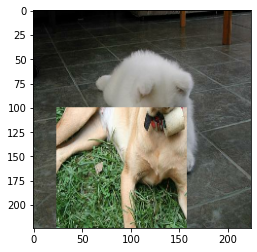

In [17]:
# Î∞îÌÉïÏù¥ÎØ∏ÏßÄ image_aÏóêÏÑú Î∞îÏö¥Îî© Î∞ïÏä§ Î∞îÍπ•Ï™Ω ÏòÅÏó≠ÏùÑ, 
# Îã§Î•∏ Ïù¥ÎØ∏ÏßÄ image_bÏóêÏÑú Î∞îÏö¥Îî© Î∞ïÏä§ ÏïàÏ™Ω ÏòÅÏó≠ÏùÑ Í∞ÄÏ†∏ÏôÄÏÑú Ìï©ÏπòÎäî Ìï®Ïàò
# mix two images
def mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    middle_left = image_a[y_min:y_max, 0:x_min, :] # image_bÏùò ÏôºÏ™Ω Î∞îÍπ• ÏòÅÏó≠
    middle_center = image_b[y_min:y_max, x_min:x_max, :]  # image_bÏùò ÏïàÏ™Ω ÏòÅÏó≠
    middle_right = image_a[y_min:y_max, x_max:image_size_x, :] # image_bÏùò Ïò§Î•∏Ï™Ω Î∞îÍπ• ÏòÅÏó≠
    middle = tf.concat([middle_left,middle_center,middle_right], axis=1)
    top = image_a[0:y_min, :, :]
    bottom = image_a[y_max:image_size_y, :, :]
    mixed_img = tf.concat([top, middle, bottom],axis=0)
    
    return mixed_img

mixed_img = mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max)
plt.imshow(mixed_img.numpy())
plt.show()

Ïß†!

### 2) ÎùºÎ≤® ÏÑûÍ∏∞

-------------------

Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÏóàÏúºÎãà ÎùºÎ≤®ÎèÑ Ïù¥Ïóê ÎßûÍ≤å ÏÑûÏñ¥Ï£ºÏñ¥Ïïº Í≤†Ï£†?      

* CutMixÏóêÏÑúÎäî Î©¥Ï†ÅÏóê ÎπÑÎ°ÄÌï¥ÏÑú ÎùºÎ≤®ÏùÑ ÏÑûÏñ¥Ï§çÎãàÎã§. 
* ÏÑûÏù∏ Ïù¥ÎØ∏ÏßÄÏùò Ï†ÑÏ≤¥ Ïù¥ÎØ∏ÏßÄ ÎåÄÎπÑ ÎπÑÏú®ÏùÑ Í≥ÑÏÇ∞Ìï¥ÏÑú Îëê Í∞ÄÏßÄ ÎùºÎ≤®Ïùò ÎπÑÏú®Î°ú ÎçîÌï¥Ï§çÎãàÎã§.     

      ex) A ÌÅ¥ÎûòÏä§Î•º Í∞ÄÏßÑ ÏõêÎûò Ïù¥ÎØ∏ÏßÄ image_aÏôÄ B ÌÅ¥ÎûòÏä§Î•º Í∞ÄÏßÑ Ïù¥ÎØ∏ÏßÄ image_bÎ•º ÏÑûÏùÑ Îïå image_aÎ•º 0.4ÎßåÌÅº ÏÑûÏóàÏùÑ Í≤ΩÏö∞, 0.4ÎßåÌÅºÏùò ÌÅ¥ÎûòÏä§ A, 0.6ÎßåÌÅºÏùò ÌÅ¥ÎûòÏä§ BÎ•º Í∞ÄÏßÄÎèÑÎ°ù Ìï¥Ï£ºÍ∏∞    
* ÎùºÎ≤®Î≤°ÌÑ∞ - ÌÅ¥ÎûòÏä§ 1Í∞úÎßå 1Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎäî Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ïù¥ ÏïÑÎãàÎùº AÏôÄ B ÌÅ¥ÎûòÏä§Ïóê Ìï¥ÎãπÌïòÎäî Ïù∏Îç±Ïä§Ïóê Í∞ÅÍ∞Å 0.4, 0.6ÏùÑ Î∞∞Î∂ÑÌïòÎäî Î∞©ÏãùÏùÑ ÏÇ¨Ïö©!!      

In [18]:
# ÏÑûÏù∏ Ïù¥ÎØ∏ÏßÄ Îëê Í∞ÄÏßÄÏóê ÎåÄÌïòÏó¨ ÎùºÎ≤®ÏùÑ ÎßåÎì§ Îïå Ï†ÅÏ†àÌïú ÎπÑÏú®Î°ú ÎùºÎ≤®ÏùÑ Ìï©Ï≥êÏ£ºÎäî Ìï®Ïàò
def mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max, num_classes=120):
    image_size_x = image_a.shape[1]
    image_size_y = image_a.shape[0] 
    mixed_area = (x_max-x_min)*(y_max-y_min)
    total_area = image_size_x*image_size_y
    ratio = tf.cast(mixed_area/total_area, tf.float32)

    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_label = (1-ratio)*label_a + ratio*label_b
    return mixed_label

mixed_label = mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max)
mixed_label

<tf.Tensor: shape=(120,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.33115435, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

In [19]:
def cutmix(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0, batch_size),tf.int32)
        image_b = image[j]
        label_b = label[j]
        x_min, y_min, x_max, y_max = get_clip_box(image_a, image_b)
        mixed_imgs.append(mix_2_images(image_a, image_b, x_min, y_min, x_max, y_max))
        mixed_labels.append(mix_2_labels(label_a, label_b, x_min, y_min, x_max, y_max))

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3


## Ïã¨Ìôî Í∏∞Î≤ï (2) Mixup Augmentation

------------------------------------

MixupÏùÄ ÏïûÏóêÏÑú Î≥¥Ïó¨ÎìúÎ¶∞ CutMixÎ≥¥Îã§ Í∞ÑÎã®ÌïòÍ≤å Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ ÏÑûÏñ¥Ï§çÎãàÎã§.     
Îëê Í∞ú Ïù¥ÎØ∏ÏßÄÏùò ÌîΩÏÖÄÎ≥Ñ Í∞íÏùÑ ÎπÑÏú®Ïóê Îî∞Îùº ÏÑûÏñ¥Ï£ºÎäî Î∞©ÏãùÏúºÎ°ú CutMixÎ≥¥Îã§ Íµ¨ÌòÑÏù¥ Í∞ÑÎã®ÌïòÎã§Í≥† Î≥º Ïàò ÏûàÏäµÎãàÎã§.

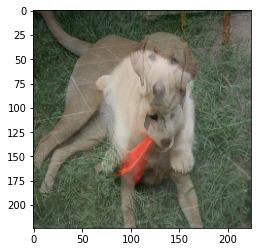

tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.39244807 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [20]:
# function for mixup
def mixup_2_images(image_a, image_b, label_a, label_b):
    ratio = tf.random.uniform([], 0, 1)
    
    if len(label_a.shape)==0:
        label_a = tf.one_hot(label_a, num_classes)
    if len(label_b.shape)==0:
        label_b = tf.one_hot(label_b, num_classes)
    mixed_image= (1-ratio)*image_a + ratio*image_b
    mixed_label = (1-ratio)*label_a + ratio*label_b
    
    return mixed_image, mixed_label

mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
plt.imshow(mixed_img.numpy())
plt.show()
print(mixed_label)

In [21]:
def mixup(image, label, prob=1.0, batch_size=16, img_size=224, num_classes=120):
    mixed_imgs = []
    mixed_labels = []

    for i in range(batch_size):
        image_a = image[i]
        label_a = label[i]
        j = tf.cast(tf.random.uniform([],0,batch_size), tf.int32)
        image_b = image[j]
        label_b = label[j]
        mixed_img, mixed_label = mixup_2_images(image_a, image_b, label_a, label_b)
        mixed_imgs.append(mixed_img)
        mixed_labels.append(mixed_label)

    mixed_imgs = tf.reshape(tf.stack(mixed_imgs), (batch_size, img_size, img_size, 3))
    mixed_labels = tf.reshape(tf.stack(mixed_labels), (batch_size, num_classes))
    return mixed_imgs, mixed_labels

print('=3')

=3
